## Nerual Network Regression

### Import Libs

In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load data

In [2]:
df = pandas.read_csv("data/NeuralNetworkRegression.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
X = df.iloc[:,0:13]
y = df.iloc[:,13].values

sc = StandardScaler()
X = sc.fit_transform(X)
y = y.reshape(-1,1)
y = sc.fit_transform(y)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
X_train

array([[ 0.05631027, -0.48772236,  1.2319449 , ..., -1.73641788,
         0.44105193,  1.92976361],
       [-0.39006371, -0.48772236, -0.18045756, ..., -0.02567665,
         0.43447332, -0.130791  ],
       [ 0.92684023, -0.48772236,  1.01599907, ...,  0.80657583,
         0.44105193,  1.82603501],
       ...,
       [-0.33056207, -0.48772236, -0.43725801, ...,  1.17646583,
         0.34281128,  0.02059668],
       [ 0.49176959, -0.48772236,  1.01599907, ...,  0.80657583,
         0.44105193,  0.07946967],
       [-0.37252742, -0.48772236, -0.72032214, ..., -0.48803915,
         0.16891656, -0.88212248]])

### Define Model

In [6]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='elu'))
model.add(Dense(40, activation='elu'))
model.add(Dense(1, activation='elu'))
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])

W0808 17:25:48.714304 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 17:25:48.728743 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 17:25:48.731873 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 17:25:48.762036 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprec

### Train Model

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=8)

W0808 17:25:49.311149 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0808 17:25:49.378820 140088287254336 deprecation_wrapper.py:119] From /home/victor/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
354/354 [==============================] - 0s 787us/step - loss: 0.6338 - mean_absolute_error: 0.5692 - acc: 0.0000e+00
Epoch 2/10
354/354 [==============================] - 0s 145us/step - loss: 0.3437 - mean_absolute_error: 0.4058 - acc: 0.0000e+00
Epoch 3/10
354/354 [==============================] - 0s 148us/step - loss: 0.2917 - mean_absolute_error: 0.3815 - acc: 0.0000e+00
Epoch 4/10
354/354 [==============================] - 0s 148us/step - loss: 0.2670 - mean_absolute_error: 0.3701 - acc: 0.0000e+00
Epoch 5/10
354/354 [==============================] - 0s 158us/step - loss: 0.2457 - mean_absolute_error: 0.3556 - acc: 0.0000e+00
Epoch 6/10
354/354 [==============================] - 0s 171us/step - loss: 0.2318 - mean_absolute_error: 0.3481 - acc: 0.0000e+00
Epoch 7/10
354/354 [==============================] - 0s 155us/step - loss: 0.2235 - mean_absolute_error: 0.3394 - acc: 0.0000e+00
Epoch 8/10
354/354 [==============================] - 0s 171us/step - loss: 0.2145 

### Predictions

In [8]:
y_pred = model.predict(X_test)

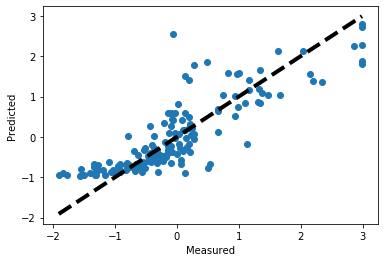

In [9]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [10]:
model.evaluate(X_test, y_test)

152/152 [==============================] - 0s 215us/step


[0.302784283694468, 0.4023610322098983, 0.0]